In [98]:
import pandas as pd

df = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Área de Trabalho\\Ironhack\\final-project-ironhack-da\\data\\cleaned\\model.csv")
df = df.sort_values("data")

In [99]:
X = df.drop(columns=["target", "selic_next", "data"])

y = df["target"]

In [100]:
split = int(len(df) * 0.8)

X_train = X.iloc[:split]
X_test  = X.iloc[split:]

y_train = y.iloc[:split]
y_test  = y.iloc[split:]

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [102]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500)

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5652173913043478
[[12  0]
 [10  1]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        12
           1       1.00      0.09      0.17        11

    accuracy                           0.57        23
   macro avg       0.77      0.55      0.44        23
weighted avg       0.76      0.57      0.45        23



In [104]:
import numpy as np

coef = model.coef_[0]
features = X.columns

importance_df = pd.DataFrame({
    "feature": features,
    "coef": coef,
    "abs_coef": np.abs(coef)
}).sort_values("abs_coef", ascending=False)

importance_df.head(15)


,feature,coef,abs_coef
16,unemployment_pct3,-0.982413,0.982413
26,ipca_lag3,0.947279,0.947279
12,debt_dbgg_pct3,-0.878640,0.878640
15,unemployment_pct1,-0.824069,0.824069
11,debt_dbgg_pct1,-0.666265,0.666265
30,unemployment_lag3,0.651241,0.651241
31,usd_brl_lag1,0.574602,0.574602
20,ibc_br_std3,0.541814,0.541814
6,usd_brl,0.539047,0.539047
4,selic_efetiva,0.498471,0.498471


In [105]:
# New approach

In [106]:
# 1. Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_pred = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.5217391304347826
Random Forest Confusion Matrix:
 [[12  0]
 [11  0]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       0.00      0.00      0.00        11

    accuracy                           0.52        23
   macro avg       0.26      0.50      0.34        23
weighted avg       0.27      0.52      0.36        23



c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
# 2. XGBoost Classifier

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

In [109]:
xgb_pred = xgb.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.5217391304347826
XGBoost Confusion Matrix:
 [[12  0]
 [11  0]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       0.00      0.00      0.00        11

    accuracy                           0.52        23
   macro avg       0.26      0.50      0.34        23
weighted avg       0.27      0.52      0.36        23



c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [110]:
print("True label distribution in y_test:", np.bincount(y_test))
print("Predicted label distribution RF:", np.bincount(rf_pred))
print("Predicted label distribution XGB:", np.bincount(xgb_pred))

True label distribution in y_test: [12 11]
Predicted label distribution RF: [23]
Predicted label distribution XGB: [23]


Random Forest ROC AUC: 0.9128787878787878
XGBoost ROC AUC: 0.8257575757575757


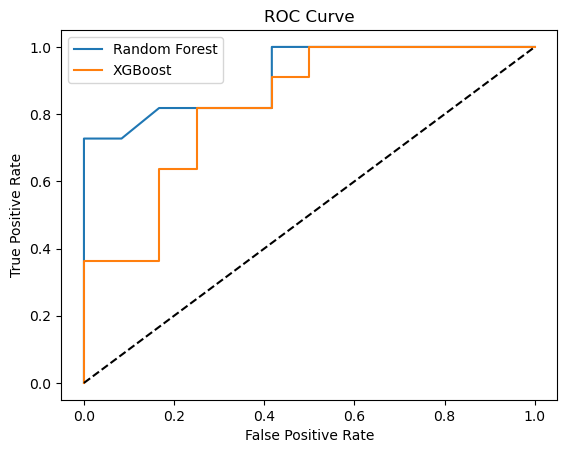

In [111]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# For Random Forest
rf_prob = rf.predict_proba(X_test_scaled)[:, 1]
xgb_prob = xgb.predict_proba(X_test_scaled)[:, 1]

print("Random Forest ROC AUC:", roc_auc_score(y_test, rf_prob))
print("XGBoost ROC AUC:", roc_auc_score(y_test, xgb_prob))

# Plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)

plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal for random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [112]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [113]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_bal, y_train_bal)   

LogisticRegression(max_iter=500, random_state=42)

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(n_estimators=300, random_state=42)

In [115]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

In [116]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

threshold = 0.25  

# Logistic Regression
logreg_probs = logreg.predict_proba(X_test_scaled)[:, 1]
logreg_pred_thresh = (logreg_probs >= threshold).astype(int)
print("\n=== Logistic Regression (threshold={}) ===".format(threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_pred_thresh))
print(classification_report(y_test, logreg_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, logreg_probs))

# Random Forest
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]
rf_pred_thresh = (rf_probs >= threshold).astype(int)
print("\n=== Random Forest (threshold={}) ===".format(threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred_thresh))
print(classification_report(y_test, rf_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, rf_probs))

# XGBoost
xgb_probs = xgb.predict_proba(X_test_scaled)[:, 1]
xgb_pred_thresh = (xgb_probs >= threshold).astype(int)
print("\n=== XGBoost (threshold={}) ===".format(threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred_thresh))
print(classification_report(y_test, xgb_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, xgb_probs))


=== Logistic Regression (threshold=0.25) ===
Confusion Matrix:
 [[12  0]
 [ 9  2]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        12
           1       1.00      0.18      0.31        11

    accuracy                           0.61        23
   macro avg       0.79      0.59      0.52        23
weighted avg       0.78      0.61      0.53        23

ROC AUC: 0.6818181818181818

=== Random Forest (threshold=0.25) ===
Confusion Matrix:
 [[10  2]
 [ 6  5]]
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.71      0.45      0.56        11

    accuracy                           0.65        23
   macro avg       0.67      0.64      0.63        23
weighted avg       0.67      0.65      0.64        23

ROC AUC: 0.7045454545454545

=== XGBoost (threshold=0.25) ===
Confusion Matrix:
 [[12  0]
 [11  0]]
              precision    recall  f1-score   support

 

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


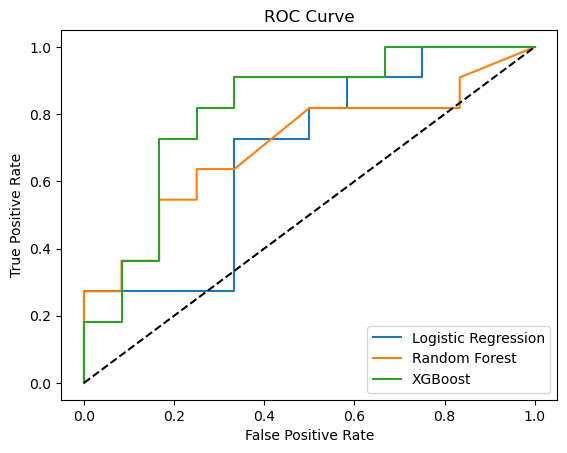

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [122]:
# Assume selic_next = future rate, selic_meta = current rate
def trend_label(row):
    if row['selic_next'] > row['selic_meta']:
        return 'Rise'
    elif row['selic_next'] < row['selic_meta']:
        return 'Fall'
    else:
        return 'Stable'

df['selic_trend'] = df.apply(trend_label, axis=1)

In [123]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['selic_trend_code'] = le.fit_transform(df['selic_trend'])  # 0,1,2 → Fall, Rise, Stable (order may vary)

In [124]:
# Columns to DROP: identifiers, targets, labels
drop_cols = [
    'data', 'selic_meta', 'selic_next', 'target', 'selic_trend', 'selic_trend_code'
]

# If you want to keep some lags and pct columns, that's fine—remove from drop list as needed
X = df.drop(columns=drop_cols)
y = df['selic_trend_code']  # Already encoded as 0, 1, 2

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # no shuffling for time series

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [128]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators=300, random_state=42)
xgb = XGBClassifier(n_estimators=400, learning_rate=0.03, max_depth=4, 
                    subsample=0.8, colsample_bytree=0.8, random_state=42)
logreg = LogisticRegression(multi_class='multinomial', max_iter=500, random_state=42)

rf.fit(X_train_bal, y_train_bal)
xgb.fit(X_train_bal, y_train_bal)
logreg.fit(X_train_bal, y_train_bal)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_list = [
    ('Logistic Regression', logreg),
    ('Random Forest', rf),
    ('XGBoost', xgb)
]

for name, model in model_list:
    pred = model.predict(X_test_scaled)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, target_names=['Fall','Rise','Stable']))


=== Logistic Regression ===
Accuracy: 0.13043478260869565
Confusion Matrix:
 [[2 0 6]
 [1 1 9]
 [4 0 0]]
              precision    recall  f1-score   support

        Fall       0.29      0.25      0.27         8
        Rise       1.00      0.09      0.17        11
      Stable       0.00      0.00      0.00         4

    accuracy                           0.13        23
   macro avg       0.43      0.11      0.14        23
weighted avg       0.58      0.13      0.17        23


=== Random Forest ===
Accuracy: 0.17391304347826086
Confusion Matrix:
 [[ 2  0  6]
 [ 0  0 11]
 [ 2  0  2]]
              precision    recall  f1-score   support

        Fall       0.50      0.25      0.33         8
        Rise       0.00      0.00      0.00        11
      Stable       0.11      0.50      0.17         4

    accuracy                           0.17        23
   macro avg       0.20      0.25      0.17        23
weighted avg       0.19      0.17      0.15        23


=== XGBoost ===
Accura

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\s